In [1]:
import matplotlib.pyplot as plt
import pickle
import utilities



In /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [8]:
def plothillclimb(file, baselines=None):
    if "pkl" not in file:
        file += ".pkl"
    if "out" not in file:
        file = "out/" + file
    with open(file,'rb') as savefile:
        save = pickle.load(savefile)
    print(save["args"])
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,8))
    accs = [log['validation']['accuracy'][-1] for (key, log) in save.items() if key != "args"]
    maxacc = max(accs)
    minacc = min(accs)
    epochsteps = [log['epochsteps'][-1] for (key, log) in save.items() if key != "args"]
    print(minacc, maxacc)
    ax1.set_yscale('log')
    for (i, (uuid, log)) in enumerate(sorted([(key, log) for (key, log) in save.items() if key != "args"], key=lambda x: x[1]['validation']['accuracy'][-1], reverse=True)):
        if i > 1000:
            break
        if len(log['epochsteps']) > 5 and log['epochsteps'][0] == log['epochsteps'][5]:
            for i in range(5):
                log['epochsteps'][i] -= 1
            for i in range(190):
                log['trainsteps'][i] -= 1
        alpha = ((log['validation']['accuracy'][-1]-minacc)/(maxacc-minacc))**8
        if i < 10 and log['epochsteps'][-1] > max(epochsteps)*0.9:
            if type(log["ghistory"][-1][-1]) is tuple:
                label = str(log["ghistory"][-1])+" - "+str(log['validation']['accuracy'][-1])[:6]
            else:
                label = str(log["ghistory"][-6:])+" - "+str(log['validation']['accuracy'][-1])[:6]
            label = label.replace('(0, 0)', '$C_1$')
            label = label.replace('(0, 1)', '$C_2$')
            label = label.replace('(0, 2)', '$C_4$')
            label = label.replace('(0, 3)', '$C_8$')
            label = label.replace('(0, 4)', '$C_{16}$')
            label = label.replace('(1, 0)', '$D_1$')
            label = label.replace('(1, 1)', '$D_2$')
            label = label.replace('(1, 2)', '$D_4$')
            label = label.replace('(1, 3)', '$D_8$')
            label = label.replace('(1, 4)', '$D_{16}$')
        else:
            label = None
        if alpha > 0.0:
            ax1.plot(log['trainsteps'], log['train']['batchloss'], alpha=alpha, linewidth = alpha)
            ax2.plot(log['epochsteps'], log['validation']['accuracy'], alpha=alpha, linewidth = alpha)
            ax3.plot(log['epochsteps'], log['validation']['accuracy'], alpha=alpha, label=label)
    ax1.set_title('Training loss')
    ax2.set_title('Validation accuracy')
    ax3.set_title('Validation accuracy (zoomed in)')
    ax1.set_xlabel('Iterations')
    ax2.set_xlabel('Iterations')
    ax3.set_xlabel('Iterations')
    ax1.set_ylabel('Loss')
    ax2.set_ylabel('Accuracy')
    ax3.set_ylabel('Accuracy')
    if baselines is not None:
        if "pkl" not in baselines:
            baselines += ".pkl"
        if "out" not in baselines:
            baselines = "out/" + baselines
        with open(baselines,'rb') as savefile:
            save = pickle.load(savefile)
        print(save["args"])
        accs = [log['validation']['accuracy'][-1] for (key, log) in save.items() if key != "args"]
        for (i, (uuid, log)) in enumerate([(key, log) for (key, log) in save.items() if key != "args"]):
            if len(log['epochsteps']) > 5 and log['epochsteps'][0] == log['epochsteps'][5]:
                for i in range(5):
                    log['epochsteps'][i] -= 1
                for i in range(190):
                    log['trainsteps'][i] -= 1
            if type(log["ghistory"][-1][-1]) is tuple:
                label = "Baseline: "+str(log["ghistory"][-1])+" - "+str(log['validation']['accuracy'][-1])[:6]
            else:
                label = "Baseline: "+str(log["ghistory"][-6:])+" - "+str(log['validation']['accuracy'][-1])[:6]
            label = label.replace('(0, 0)', '$C_1$')
            label = label.replace('(0, 1)', '$C_2$')
            label = label.replace('(0, 2)', '$C_4$')
            label = label.replace('(0, 3)', '$C_8$')
            label = label.replace('(0, 4)', '$C_{16}$')
            label = label.replace('(1, 0)', '$D_1$')
            label = label.replace('(1, 1)', '$D_2$')
            label = label.replace('(1, 2)', '$D_4$')
            label = label.replace('(1, 3)', '$D_8$')
            label = label.replace('(1, 4)', '$D_{16}$')
            ax1.plot(log['trainsteps'], log['train']['batchloss'], alpha=alpha, linewidth = alpha)
            ax2.plot(log['epochsteps'], log['validation']['accuracy'], alpha=alpha, linewidth = alpha)
            ax3.plot(log['epochsteps'], log['validation']['accuracy'], alpha=alpha, label=label)
    ax3.set_ylim(0.8*maxacc, 1.05*maxacc)
    ax3.legend(loc='upper left')
    plt.savefig(file[:-2]+'ng')


{'epochs': 0.2, 'iterations': 50, 'lr': 0.03, 'allkids': False, 'popsize': 10, 'baselines': False, 'data': PosixPath('/tmpdir/maile'), 'd16': False, 'c4': False, 'seed': -1, 'dea': True, 'noskip': False, 'pareto': True, 'test': False, 'folder': ''}
0.2904166877269745 0.9600000381469727
{'epochs': 0.2, 'iterations': 50, 'lr': 0.03, 'allkids': False, 'popsize': 10, 'baselines': True, 'data': PosixPath('/tmpdir/maile'), 'd16': False, 'c4': False, 'seed': -1, 'dea': True, 'noskip': False, 'pareto': False, 'test': False, 'folder': ''}


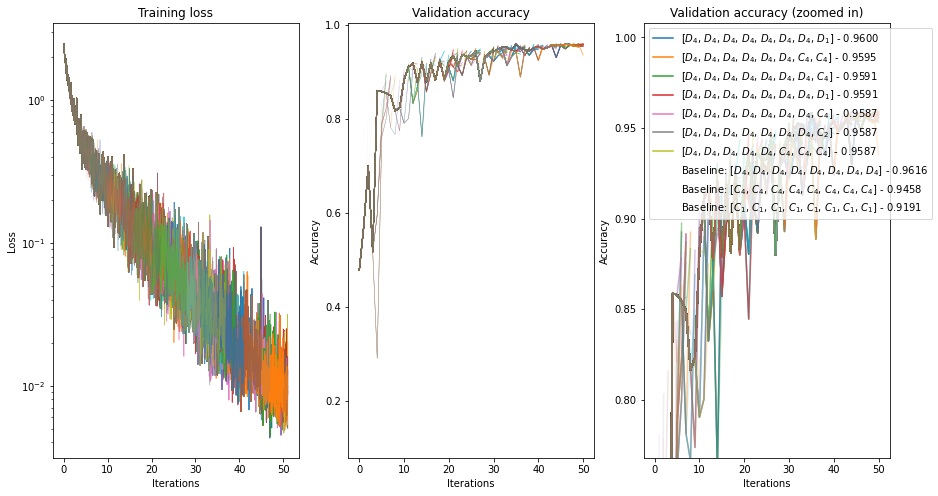

In [9]:
plothillclimb("out/olympe/logshc_2022-09-13_16:52:16.pkl","out/olympe/logsbs_2022-09-13_16:52:20.pkl")

{'epochs': 1, 'iterations': 50, 'lr': 0.1, 'allkids': False, 'popsize': 10, 'baselines': False, 'reg': False, 'skip': False, 'data': PosixPath('/tmpdir/maile'), 'd16': False, 'c4': True, 'seed': -1, 'dea': True}
0.5450000166893005 0.9541667103767395


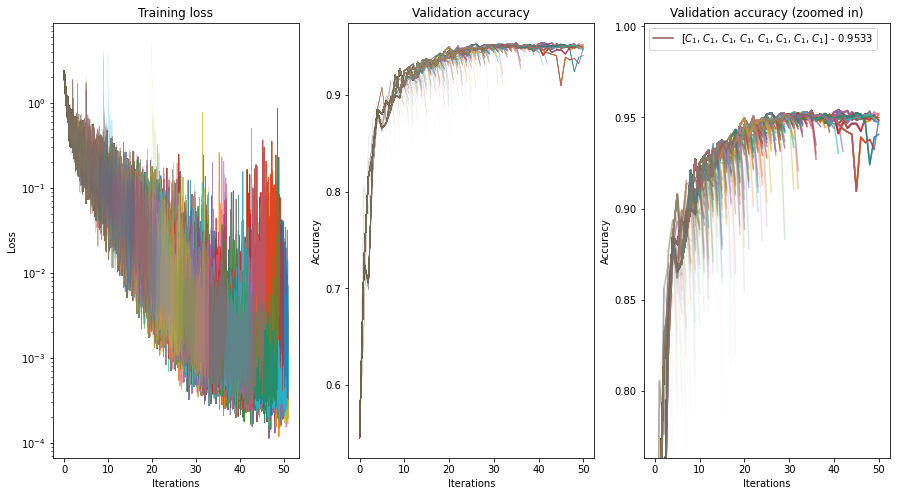

In [ ]:
plothillclimb("out/olympe/logshc_2022-09-06_12:05:30.pkl")

{'epochs': 1, 'iterations': 50, 'lr': 0.1, 'allkids': False, 'popsize': 10, 'baselines': False, 'reg': False, 'skip': False, 'data': PosixPath('/tmpdir/maile'), 'd16': False, 'c4': True, 'seed': -1, 'dea': True}
0.48500001430511475 0.9750000238418579


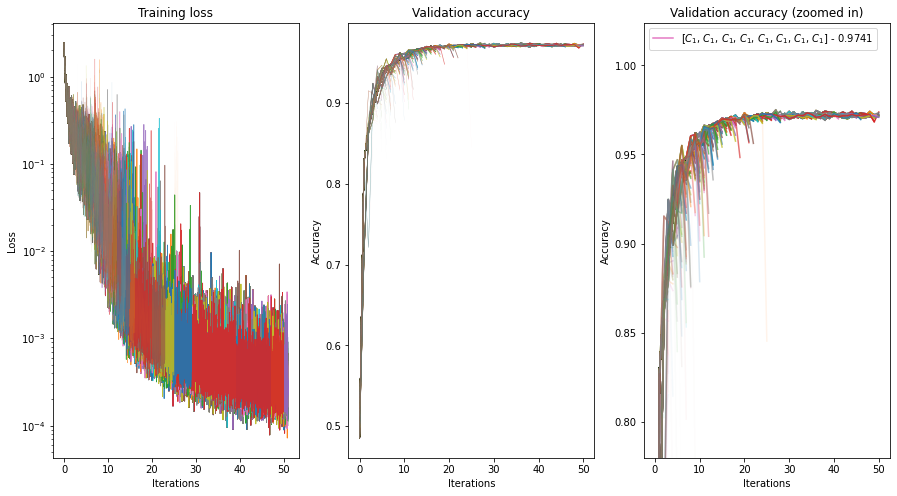

In [ ]:
plothillclimb("out/olympe/logshc_2022-09-06_15:52:35.pkl")

{'epochs': 0.5, 'iterations': 50, 'lr': 0.03, 'allkids': False, 'popsize': 10, 'baselines': False, 'reg': False, 'skip': False, 'data': PosixPath('/tmpdir/maile'), 'd16': False, 'c4': True, 'seed': -1, 'dea': True}
0.6045833230018616 0.9666666984558105


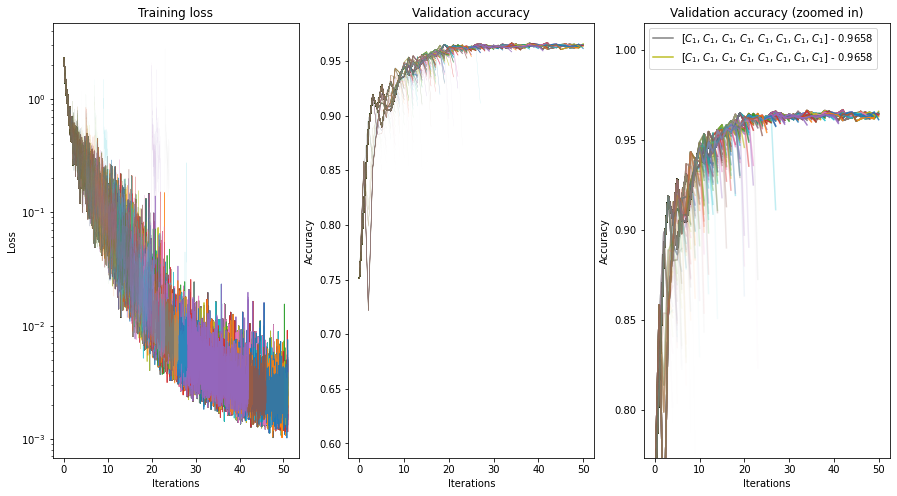

In [ ]:
plothillclimb("out/olympe/logshc_2022-09-08_18:45:11.pkl")

{'epochs': 1.0, 'iterations': 50, 'lr': 0.1, 'allkids': False, 'popsize': 10, 'baselines': False, 'data': PosixPath('/tmpdir/maile'), 'd16': False, 'c4': False, 'seed': -1, 'dea': True}
0.6008333563804626 0.9737499952316284


No handles with labels found to put in legend.


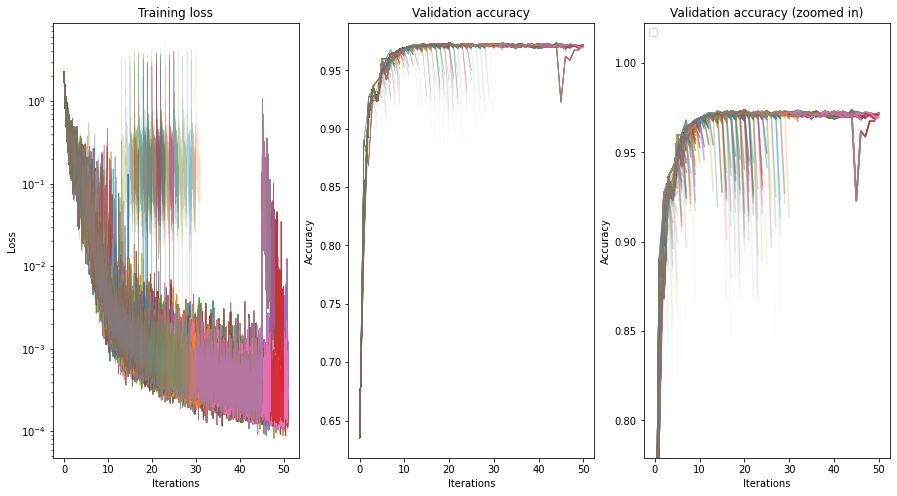

In [ ]:
plothillclimb("out/olympe/logshc_2022-09-09_14:20:04.pkl")

{'epochs': 0.5, 'iterations': 50, 'lr': 0.03, 'allkids': False, 'popsize': 10, 'baselines': False, 'data': PosixPath('/tmpdir/maile'), 'd16': False, 'c4': True, 'seed': -1, 'dea': True}
0.5912500023841858 0.9633333683013916


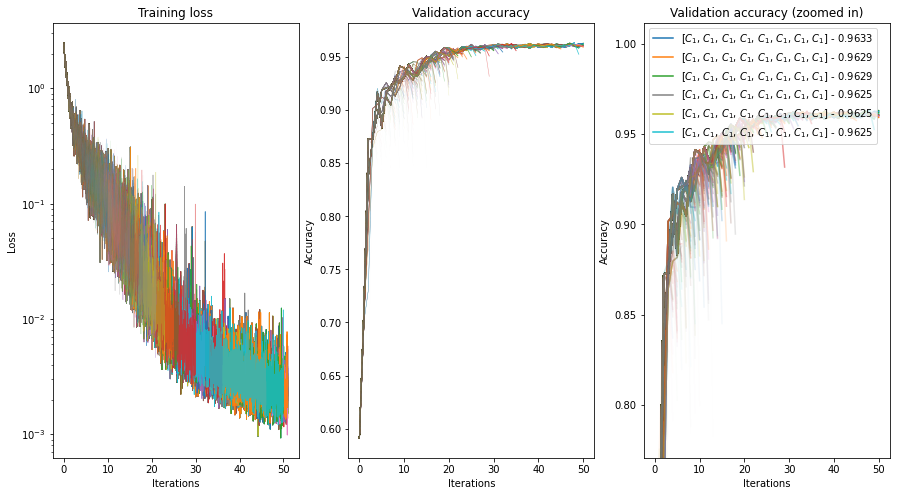

In [ ]:
plothillclimb("out/olympe/logshc_2022-09-09_14:22:08.pkl")

{'epochs': 0.5, 'iterations': 50, 'lr': 0.1, 'allkids': False, 'popsize': 10, 'baselines': False, 'data': PosixPath('/tmpdir/maile'), 'd16': False, 'c4': False, 'seed': -1, 'dea': True}
0.2604166865348816 0.9762500524520874


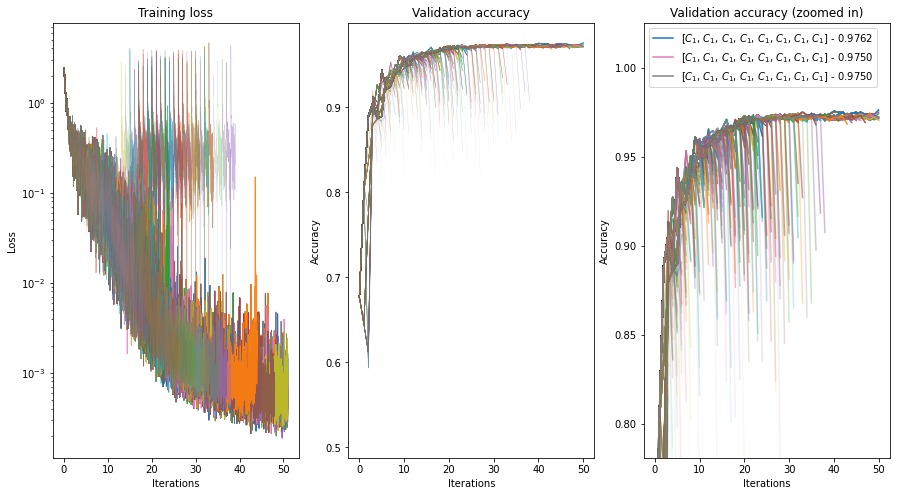

In [ ]:
plothillclimb("out/olympe/logshc_2022-09-09_16:37:30.pkl")

{'epochs': 0.5, 'iterations': 50, 'lr': 0.1, 'allkids': False, 'popsize': 10, 'baselines': False, 'data': PosixPath('/tmpdir/maile'), 'd16': False, 'c4': False, 'seed': -1, 'dea': True}
0.2604166865348816 0.9762500524520874


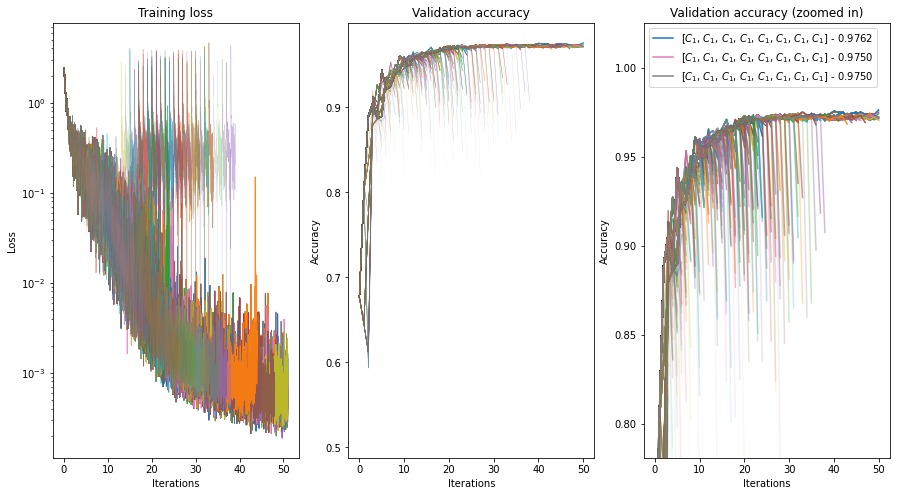

In [3]:
plothillclimb("out/olympe/logshc_2022-09-09_16:37:30.pkl")

{'epochs': 0.2, 'iterations': 50, 'lr': 0.1, 'allkids': False, 'popsize': 10, 'baselines': False, 'data': PosixPath('/tmpdir/maile'), 'd16': False, 'c4': False, 'seed': -1, 'dea': True}
0.2162500023841858 0.9704166650772095


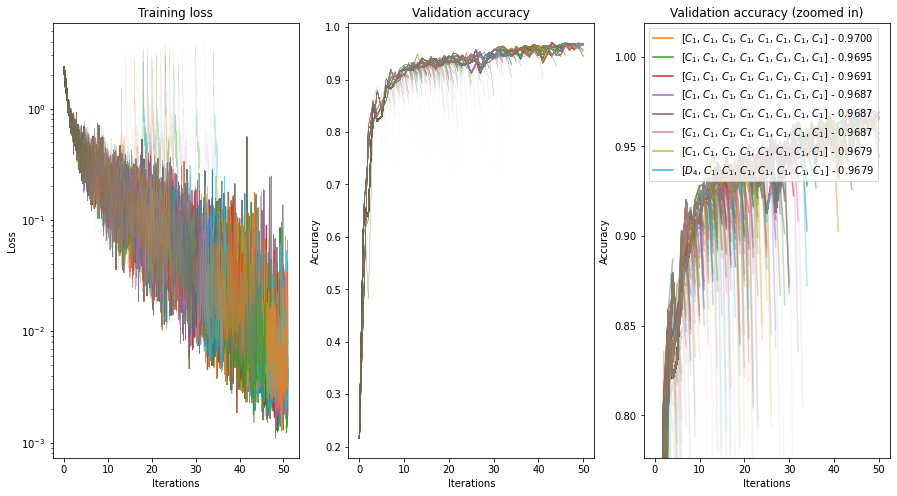

In [ ]:
plothillclimb("out/olympe/logshc_2022-09-09_16:53:27.pkl")

{'epochs': 0.2, 'iterations': 50, 'lr': 0.03, 'allkids': False, 'popsize': 10, 'baselines': False, 'data': PosixPath('/tmpdir/maile'), 'd16': False, 'c4': True, 'seed': -1, 'dea': True}
0.25874999165534973 0.965416669845581


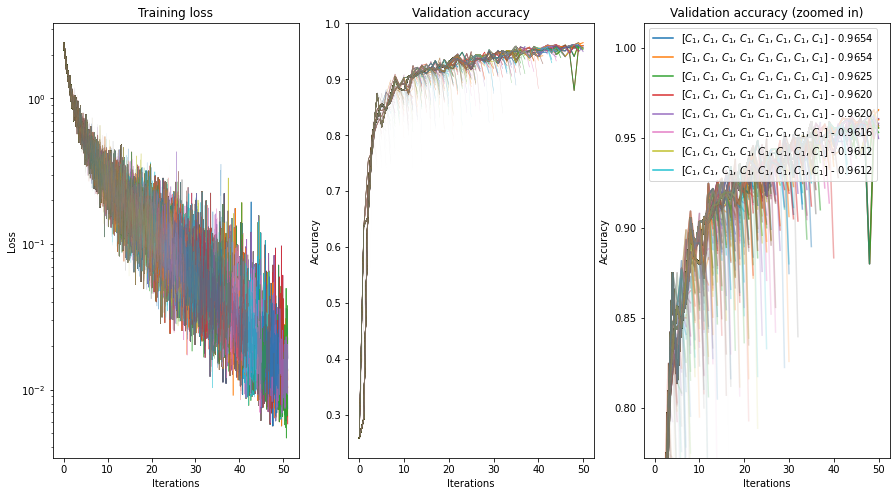

In [ ]:
plothillclimb("out/olympe/logshc_2022-09-09_17:52:37.pkl")

{'epochs': 0.2, 'iterations': 50, 'lr': 0.03, 'allkids': False, 'popsize': 10, 'baselines': False, 'data': PosixPath('/tmpdir/maile'), 'd16': False, 'c4': False, 'seed': -1, 'dea': True, 'pareto': False}
0.25208333134651184 0.9641667008399963


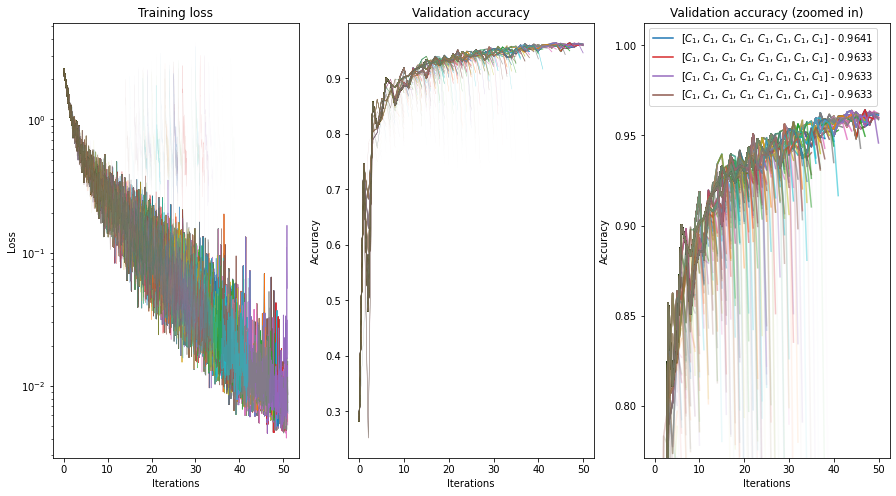

In [4]:
plothillclimb("out/olympe/logshc_2022-09-13_13:46:05.pkl")